In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

En primer lugar, vamos a revisar las versiones de nuestras librerías principales.

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
keras.__version__

'2.8.0'

Keras provee algunas funciones de utilidad para descargar y cargar conjuntos de datos comunes. En este caso, vamos a utilizar el dataset llamado MNIST. Vamos a cargarlo:

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

Antes de comenzar a procesar los datos, vamos a verlos.

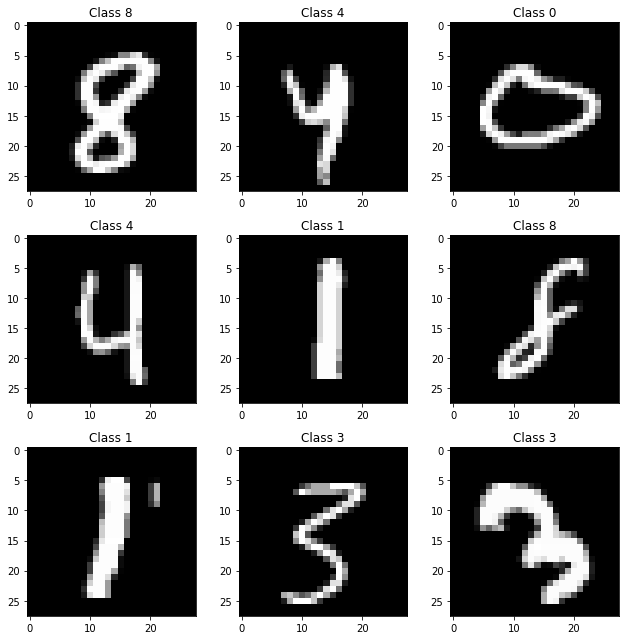

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

A diferencia de Scikit Learn, Keras representa las imágenes como un arreglo. En este caso, son imágenes de tamaño 28x28. Además, la intensidad de cada pixel se representa como enteros enter 0 y 255.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

Se carga el dataset en las variables de entrenamiento y prueba. Además, vamos a considerar un conjunto de validación para evaluar finalmente la red neuronal. 

Por otro lado, debemos normalizar los valores de la matriz (que van de 0 a 255) para que solo sean valores entres 0 y 1. Por esto, dividimos entre 255. Con esto, adicionalmente, los valores pasan a ser de punto flotante.

In [ ]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_train.shape

(55000, 28, 28)

Vamos a construir el modelo de la red neuronal. Empecemos con un MLP con dos capas ocultas. La idea es la siguiente:

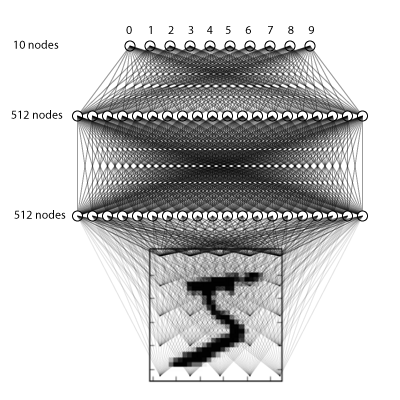

In [ ]:
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(300, activation='relu')) # la capa densa compuesta por 300 neuronas
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu')) # segunda capa densa compuesta por 100 neuronas
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

Recuerden que la función ReLU se ve así:

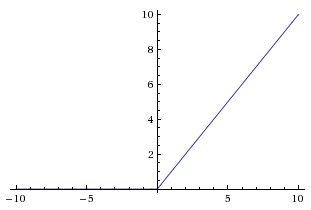

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Usualmente, los valores de los pesos iniciales se eligen de forma aleatoria y el valor del bias se inicialzia en 0.

Después de crear el modelo, debemos compilarlo con el método `compile()`. Con él se puede especificar la función de pérdida y el optimizador, además de otras métricas a calcular durante el entrenamiento y evaluación.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1389 - accuracy: 0.9615 - val_loss: 0.1326 - val_accuracy: 0.9644
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1257 - accuracy: 0.9646 - val_loss: 0.1231 - val_accuracy: 0.9676
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1143 - accuracy: 0.9681 - val_loss: 0.1176 - val_accuracy: 0.9682
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1052 - accuracy: 0.9706 - val_loss: 0.1094 - val_accuracy: 0.9692
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0967 - accuracy: 0.9729 - val_loss: 0.1032 - val_accuracy: 0.9704
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9747 - val_loss: 0.0997 - val_accuracy: 0.9720
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0827 - accuracy: 0.9766 - val_loss: 0.0970 - val_accuracy:

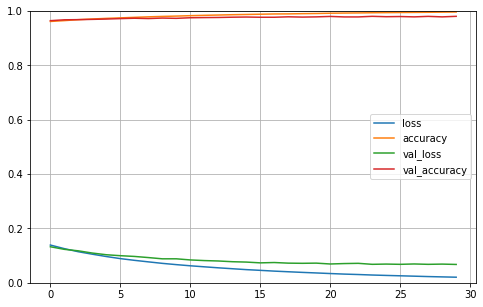

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

Para realizar la evaluación final del modelo se utilizar el método `evaluate()` pasando como argumentos `X_test` y `y_test`.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 14.1188 - accuracy: 0.9755


[14.11882495880127, 0.9754999876022339]

Igual que Scikit Learn, es posible predecir las etiquetas del conjunto de prueba. Noten que regresa un arreglo con todas las predicciones.

In [ ]:
predictions = model.predict(X_test)

¿Cómo se ve la predicción? Es un arreglo de (en este caso) 10 clases, donde a cada entrada se le asigna un valor de 'probabilidad'. Para determinar el valor final de la clase, se considera el más alto entre todos ellos.

In [ ]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

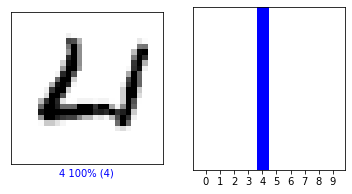

In [ ]:
i = 33
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

¿Qué sucede si no obtengo un buen rendimiento? ¡Debemos tunear los parámetros¡


* El primer parámetro que debe uno revisar es la taza de aprendizaje del Gradiente. Entre más pequeña sea, más tarda en converger.
* La segunda opción es ajustar distintos hiperparámetros del modelo:
 * Número de capas
 * Número de neuronas por capa
 * Las funciones de activación
* Otra opción es ajustar el tamaño del batch (por default 32).

